In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 2.00MB/s]

Extracting files...
Path to dataset files: C:\Users\chatt\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [4]:
books = pd.read_csv(f"{path}/books.csv")

In [5]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [6]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [9]:
books.nunique()

isbn13            6810
isbn10            6810
title             6398
subtitle          2009
authors           3780
categories         567
thumbnail         6481
description       6474
published_year      94
average_rating     200
num_pages          915
ratings_count     3881
dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

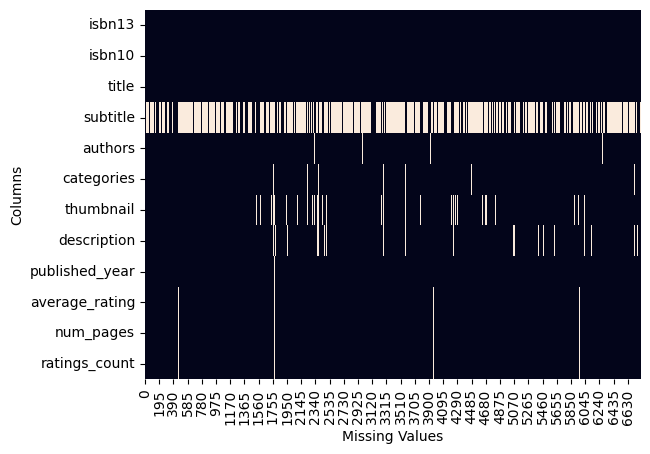

In [12]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar = False, ax = ax)

plt.xlabel("Missing Values")
plt.ylabel("Columns")

plt.show()

A clear Pattern of missing values for the columns "average_rating", "num_pages", "ratings_count". The missing values correspond in all three columns.
Conclusion: These could be from a different dataset with missing entries of books. Might be source of bias. Need to take a close look

In [13]:
import numpy as np

In [14]:
books['missing_description'] = np.where(books['description'].isna(),1,0)
books["age_of_book"] = 2025 - books['published_year']

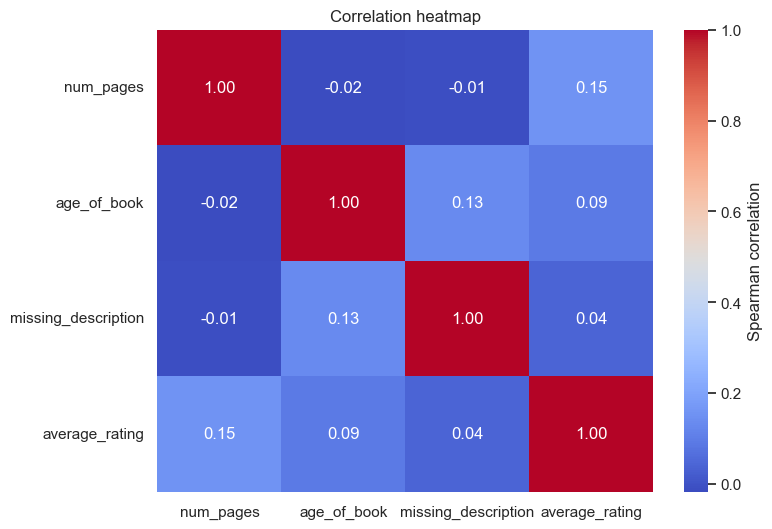

In [16]:
columns_of_interest = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style = 'white')
plt.figure(figsize = (8,6))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt =".2f", cmap = 'coolwarm', cbar_kws={"label":"Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

To see, if there is any correlation with missing_description. Because description is the most important field. So if missing_description has a strong correlation with let's say num_pages, then on eliminating entries with missing_description = 0, we would be biasing ourselves towards either longer or shorter books.

In [20]:
books[(books['description'].isna()) |
      (books['num_pages'].isna()) |
      (books['average_rating'].isna()) |
      (books['published_year'].isna()) ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


303 entries. So given the size of the dataset, this number is well under 5%. So we can get rid of these observations

In [21]:
book_missing =books[~(books['description'].isna()) &
      ~(books['num_pages'].isna()) &
      ~(books['average_rating'].isna()) &
      ~(books['published_year'].isna()) ]

In [22]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [24]:
vc_df =book_missing['categories'].value_counts().reset_index().sort_values('count', ascending=False)

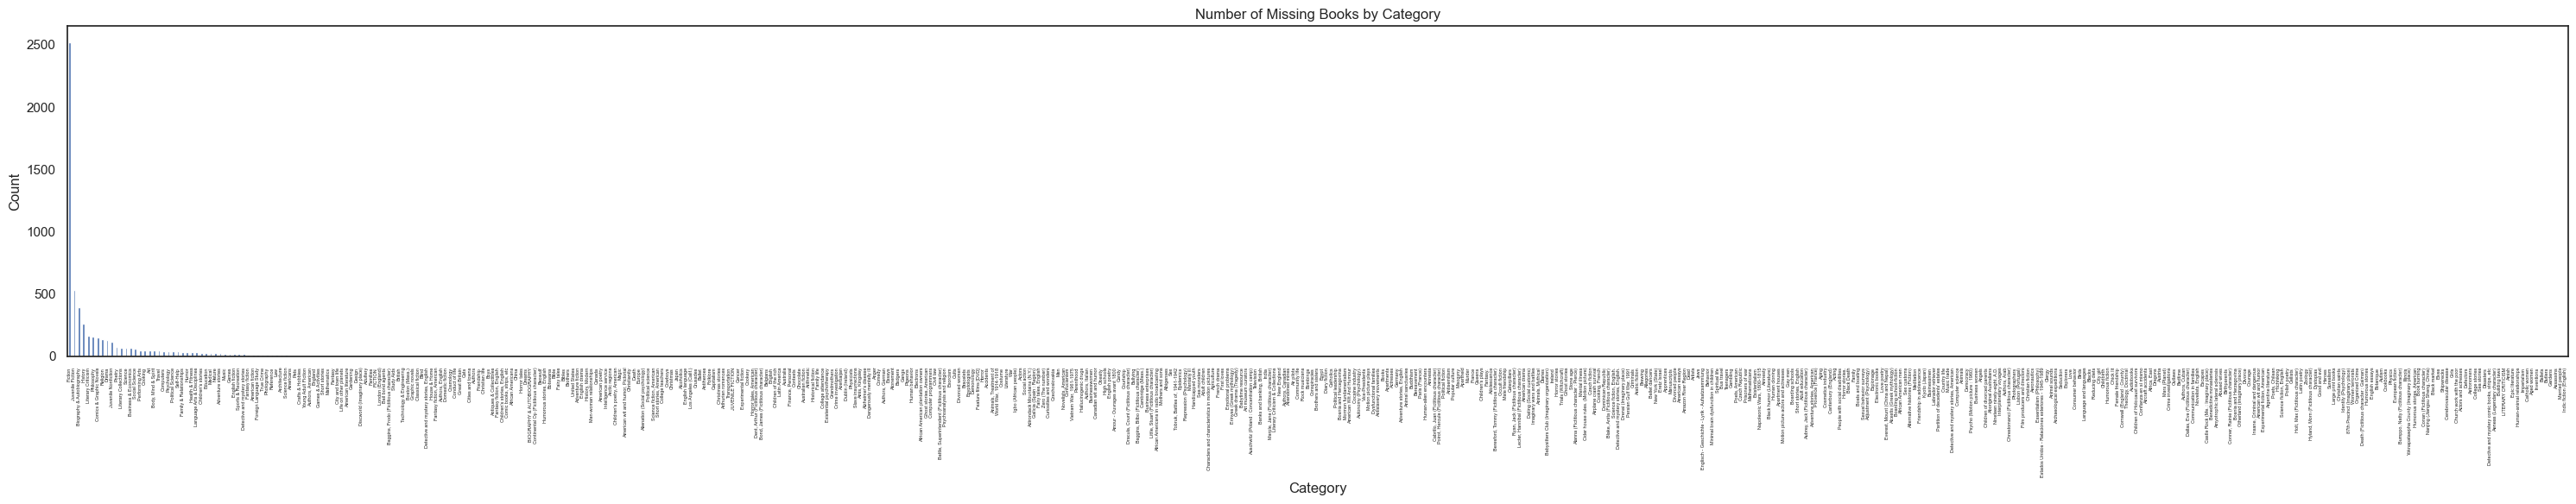

In [29]:
fig, ax = plt.subplots(figsize=(30,6))
vc_df.plot(
    kind='bar',
    x='categories',
    y='count',
    ax=ax,
    legend=False
)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Number of Missing Books by Category')
plt.xticks(rotation=90, fontsize=4)
plt.tight_layout()
plt.show()

Very Uneven Categories. Long Tail problem!

In [30]:
book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

C:\Users\chatt\AppData\Local\Temp\ipykernel_43424\2882849729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].str.split().str.len()


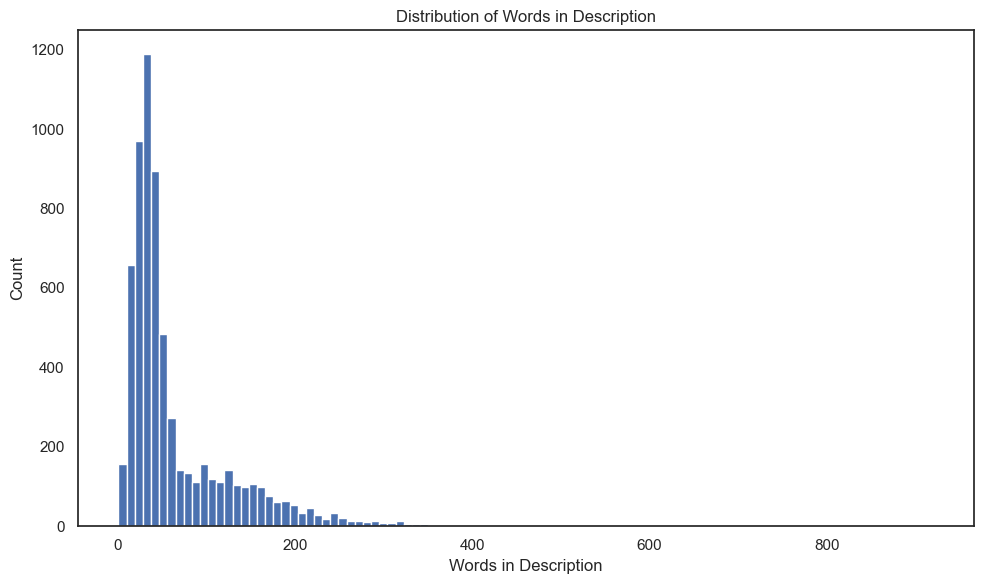

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(book_missing['words_in_description'], bins=100)
plt.xlabel('Words in Description')
plt.ylabel('Count')
plt.title('Distribution of Words in Description')
plt.tight_layout()
plt.show()

In [39]:
book_missing.loc[book_missing['words_in_description'].between(25,34),'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [40]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [41]:
book_missing_25_words['title_and_subtitle'] = (np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'], book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join, axis=1)))

C:\Users\chatt\AppData\Local\Temp\ipykernel_43424\4162569893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['title_and_subtitle'] = (np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'], book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join, axis=1)))


In [42]:
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)

C:\Users\chatt\AppData\Local\Temp\ipykernel_43424\2569524539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


In [43]:
(book_missing_25_words.drop(['subtitle', 'missing_description','age_of_book','words_in_description'], axis = 1)).to_csv('books_cleaned.csv', index = False)